# Sign Glove

Ploting the Data we get from the Flex Sensors and the IMU sensor to visually see the difference between the signs

Import Libraries and connect to Google Drive

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import NumPy for numerical computations

# generate accesss to the drive (=data)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This code reads IMU data from CSV files, splits the data into separate columns for XAcc, YAcc, ZAcc, XGyro, YGyro, and ZGyro, converts the data to numeric format, and plots the data for each axis against time. Each plot represents one direction (x, y, or z) of IMU data.

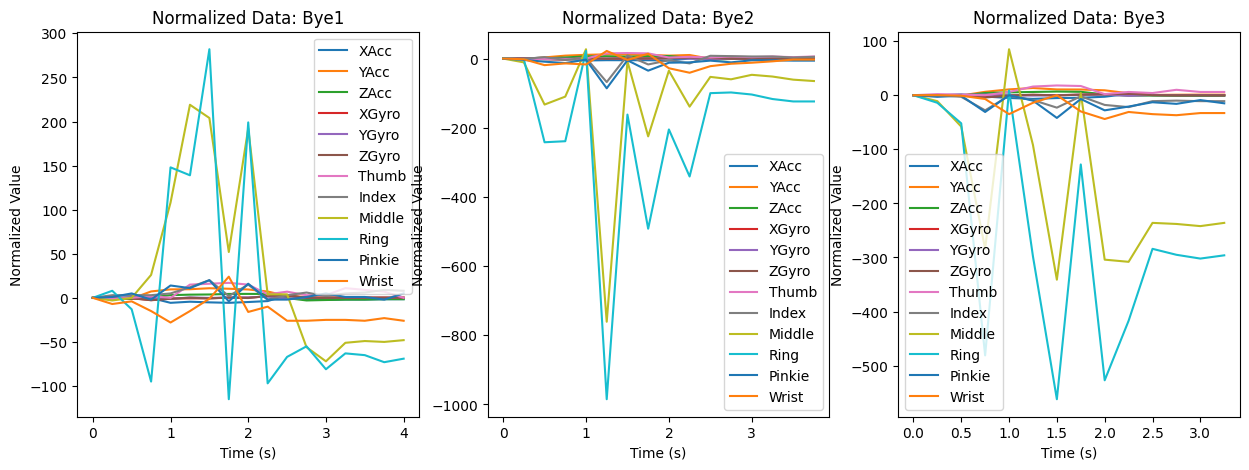

In [2]:
def plot_data(file_paths):
    num_plots = len(file_paths)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = -(-num_plots // num_cols)  # Ceiling division to calculate number of rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    if num_rows == 1 or num_cols == 1:
        axes = [axes]  # Convert to 2D array if it's 1D

    for idx, file_path in enumerate(file_paths):
        # Extract plot name from file path
        plot_name = 'Bye' + str(idx+1)

        # Load the CSV file into a DataFrame
        data = pd.read_csv(file_path, delimiter=';')

        # Normalize the data
        normalized_data = data.copy()
        for column in normalized_data.columns:
            # Subtract the first value of each column from all values in that column
            normalized_data[column] -= normalized_data[column].iloc[0]

        # Convert index to seconds
        time_seconds = normalized_data.index * 0.25

        # Determine subplot position
        row_idx = idx // num_cols
        col_idx = idx % num_cols

        # Plotting the data
        for column in normalized_data.columns:
            axes[row_idx][col_idx].plot(time_seconds, normalized_data[column], label=column)

        axes[row_idx][col_idx].set_xlabel('Time (s)')
        axes[row_idx][col_idx].set_ylabel('Normalized Value')
        axes[row_idx][col_idx].legend()
        axes[row_idx][col_idx].set_title('Normalized Data: ' + plot_name)

    # Hide empty subplots
    for idx in range(num_plots, num_rows * num_cols):
        row_idx = idx // num_cols
        col_idx = idx % num_cols
        if num_rows > 1:
            fig.delaxes(axes[row_idx][col_idx])
        else:
            fig.delaxes(axes[col_idx])

    plt.show()

# List of file paths
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Bye/Bye1.csv',
    '/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Bye/Bye2.csv',
    '/content/drive/MyDrive/Colab Notebooks/MCI /Sign Glove/Data/Bye/Bye3.csv'
]

# Call the function with the list of file paths
plot_data(file_paths)